# Resistor inductor capacitor circuit model

Model of [RLC cicuit](https://en.wikipedia.org/wiki/RLC_circuit), by using the Euler's function
$e^{(a+ib)t}$ as solution for differential equation:
$$L\frac{\partial^2 f(t)}{\partial t^2} + R\frac{\partial f(t)}{\partial t} + \frac{1}C f(t) = 0$$

> Note:  
> Precisely, the $e^{(a+ib)t+(c+id)}$ is also a solution, where the exponent is a first degree polynomial
> with complex coefficients, like $\Omega t+\Phi$.
> However, a higher degree polynomial in the exponent should not be a solution, as the differential equation
> will require specific values of $t$.

The exponent coefficients can be easily calculated from a few circuit signal values over the time.
The problem is that this requires the _actual complex_ values of this asignal, but in real-world scenario
we have the _real_ parts only.

This is an attempt to reconstruct the _actual imaginary_ part of a circuit signal values, in order to
calculate all the coefficients of the Euler's function, that drives that signal.

## Background

The relation between $L$, $R$, $\frac{1}C$ and exponent coefficients, can be obtained by solving the equation
by using the Euler's function:
$$L\frac{\partial^2 e^{(a+ib)t}}{\partial t^2} + R\frac{\partial e^{(a+ib)t}}{\partial t} + \frac{1}C e^{(a+ib)t} = $$
$$= L(a+ib)^2e^{(a+ib)t} + R(a+ib)e^{(a+ib)t} + \frac{1}C e^{(a+ib)t} = 0 \implies$$
$$\implies \boxed{L(a+ib)^2 + R(a+ib) + \frac{1}C = 0}$$

> $a$ is the inverted [time-constant](https://en.wikipedia.org/wiki/Time_constant) ($\frac{1}\tau$)  
> $b$ is angular frequency of the oscillation ($\omega$)

### Exponent coefficients from circuit parameters

If $a$ and $b$ are the unknowns, this can be solved as system of two equations, for the real and imaginary components:

$L(a^2-b^2+i2ab) + R(a+ib) + \frac{1}C = (La^2 - Lb^2 + Ra + \frac{1}C) + i(2La + R)b = 0$

$\begin{cases}L(a^2-b^2) + Ra + \frac{1}C = 0 \\ (2La + R)b = 0\end{cases}$

- Solutions of the imaginary component:

  $\begin{cases}a \to \text{any}, b=0 \\ a=-\frac{R}{2L}, b\to \text{any}\end{cases}$

- Replace in the real component:

  - $b=0 \implies La^2 + Ra + \frac{1}C = 0$ $\to$ _quadratic equation_

    $\boxed{a = \frac{-R \pm\sqrt{R^2 - 4\frac{L}{C}}}{2L}}$

  - $a=-\frac{R}{2L} \implies L\frac{R^2}{4L^2} - Lb^2 - R\frac{R}{2L} + \frac{1}C = \left(\frac{R^2}{4L} - \frac{R^2}{2L}\right) - Lb^2 + \frac{1}C = 0$

    $Lb^2 = -\frac{R^2}{4L} + \frac{1}C \implies \boxed{b = \pm\frac{\sqrt{4\frac{L}C - R^2}}{2L}}$

    when $4\frac{L}C < R^2$, $b$ is imaginary number $\implies ib$ is real, thus it is actually part of $a$:

    $a+ib = -\frac{R}{2L} + i^2\frac{\pm\sqrt{R^2-4\frac{L}C}}{2L} \implies a = \frac{-R \pm\sqrt{R^2 - 4\frac{L}{C}}}{2L}$ $\to$ _the same as_ $b=0$ _case_

- Summary of possible solutions for $a$ and $b$:

$$\begin{cases} a = \frac{-R \pm\sqrt{R^2 - 4\frac{L}{C}}}{2L}, b = 0; \text{if } 4\frac{L}C < R^2 \\ a=-\frac{R}{2L}, b = \pm\frac{\sqrt{4\frac{L}C - R^2}}{2L}; \text{if } 4\frac{L}C > R^2\end{cases}$$

### Circuit parameters from exponent coefficients

If $L$, $R$ and $C$ need to be found, this can be solved for some a combined unknowns, like $LC$ and $RC$:

$\begin{cases}(a^2-b^2)L + aR + \frac{1}C = 0 \\ (2La + R)b = 0\end{cases}$

- When $b \ne 0$ (oscillating system)

  - From the imaginary component: $\frac{R}L=-2a$

  - From the real component: $a^2 - b^2 + \frac{R}{L}a+\frac{1}{LC} = a^2 - b^2 - 2a^2 + \frac{1}{LC} = 0$
    $\implies \frac{1}{LC} = a^2 + b^2$

    $$\begin{cases}LC = \frac{1}{a^2 + b^2} \\ RC = -\frac{2a}{a^2 + b^2}\end{cases}$$

- When $b = 0$ (exponential _decay_ only), the imaginary component does not bind $L$ and $R$

  $La^2 + Ra + \frac{1}C = 0$ $\implies a^2LC + aRC = -1$
  $$LC = -\frac{aRC + 1}{a^2} \text{ or } RC = -\frac{a^2LC + 1}{a}$$

## Reference plots

These plots demonstrate the simplification, to be achieved by using the actual complex signal value.
Of course, this requires to discover its imaginary component part, by using the real one.


In [1]:
# Preparation
import cmath
import plotly.graph_objects as go

def calc_euler_deriv(euler_omega: complex, t: float, lvl: int=0) -> complex:
    """Euler foumula"""
    return euler_omega ** lvl * cmath.e ** (euler_omega * t)

EPSILON=1e-14
def crop_val(v: float, limit: float=1/EPSILON) -> float:
    return v if abs(v) < limit else cmath.nan

# Input values
OMEGA = complex(-cmath.pi/32, cmath.pi/6)
t_range = range(40)
deriv_vals = []
for lvl in range(4):
    deriv_vals.append([calc_euler_deriv(OMEGA, t, lvl) for t in t_range])
func_vals = deriv_vals[0]

# Default plotly figure parameters
DEF_FIGURE={'layout': {'margin': {'b': 8, 'l': 8, 'r': 8, 't': 8}}}

### Complex logarithm

Below is a plot of the real part of the base function $e^{(a+ib)t}$ and its logarithm.

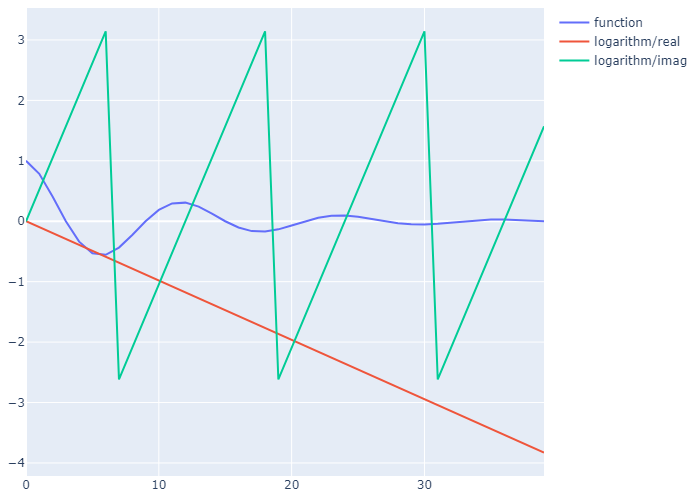

In [2]:
# Function and logarithm plot
log_vals = [cmath.log(v) for v in func_vals]

fig = go.Figure(**DEF_FIGURE)
fig.add_scatter(y=[v.real for v in func_vals], name='function')
fig.add_scatter(y=[v.real for v in log_vals], name='logarithm/real')
fig.add_scatter(y=[v.imag for v in log_vals], name='logarithm/imag')
fig.show()

> Both real and imaginary components of the logarithm are linear, even if the imaginary wraps around $\pm\pi$.
> However, this is just because this is a logarithm from the actual complex value.

### Complex ratio with the derivative

Below is a plot of the real part of the base function $e^{(a+ib)t}$ and its derivative $(a+ib)e^{(a+ib)t}$,
together with their ratio $\frac{(a+ib)e^{(a+ib)t}}{e^{(a+ib)t}} = a+ib$.

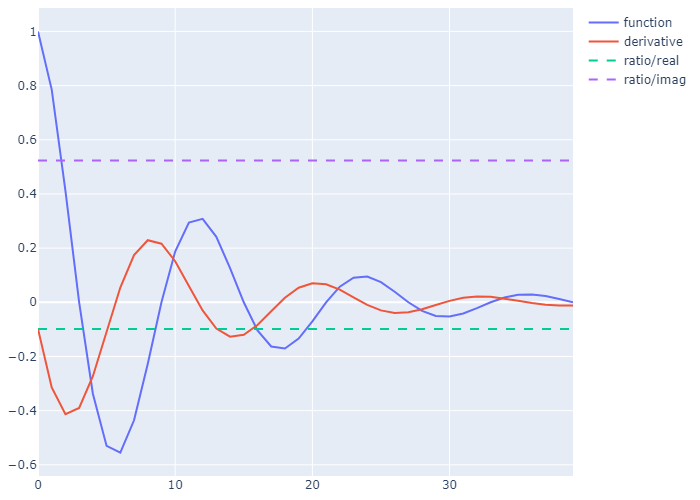

In [3]:
# Function and derivative plot
fig = go.Figure(**DEF_FIGURE)
fig.add_scatter(y=[v.real for v in func_vals], name='function')
fig.add_scatter(y=[v.real for v in deriv_vals[1]], name='derivative')
fig.add_scatter(y=[(dv/fv).real for fv,dv in zip(func_vals, deriv_vals[1])],
        name='ratio/real', line_dash='dash')
fig.add_scatter(y=[(dv/fv).imag for fv,dv in zip(func_vals, deriv_vals[1])],
        name='ratio/imag', line_dash='dash')
fig.show()

> Both real and imaginary components of the ratio are constant.
> However, this is just because we are dividing the actual complex values.

## Deduction of signal imaginary value

The signal imaginary value should be able to be obtained by analysing its logarithm and/or derivative.

### Using real part of the logarithm only

Since $e^{(a+ib)t} = e^{at}cos(bt) + i.e^{at}sin(bt)$, the logarithm of its real part is:
$$log(e^{at}cos(bt)) = at + log(cos(bt))$$

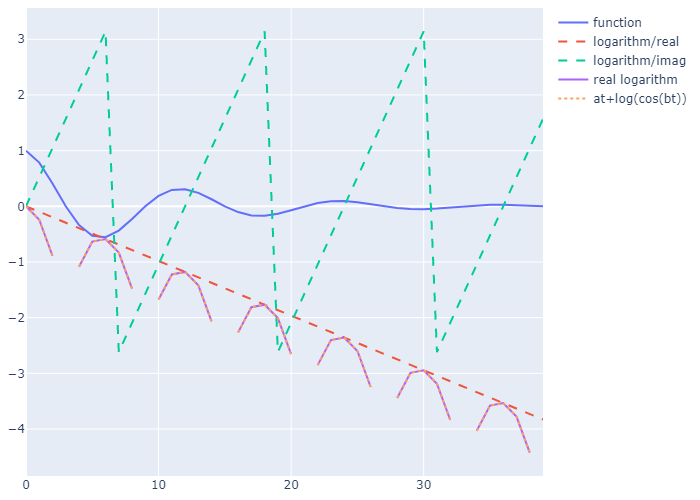

In [4]:
# Logarithm of function's real part plot
log_r_vals = [cmath.log(v.real).real for v in func_vals]
crop_at = 30*max(v.real for v in func_vals)

fig = go.Figure(**DEF_FIGURE)
fig.add_scatter(y=[v.real for v in func_vals], name='function')
fig.add_scatter(y=[v.real for v in log_vals], name='logarithm/real', line_dash='dash')
fig.add_scatter(y=[v.imag for v in log_vals], name='logarithm/imag', line_dash='dash')
fig.add_scatter(y=[crop_val(v, crop_at) for v in log_r_vals], name='real logarithm')
fig.add_scatter(y=[OMEGA.real*t + crop_val(cmath.log(cmath.cos(OMEGA.imag*t)).real, crop_at) for t in t_range],
        name='at+log(cos(bt))', line_dash='dot')
fig.show()

### Using real part of derivative and function only

Since $e^{(a+ib)t} = e^{at}cos(bt) + i.e^{at}sin(bt)$, the derivative of its real part
$e^{at}cos(bt)$ is:

$$\frac{\partial e^{at}cos(bt)}{\partial t} = ae^{at}cos(bt) - be^{at}sin(bt)$$

> The real part of actual derivative is the same as the derivative of the real part above.

#### Main problem to be solved

The ratio between these real parts is **NOT** a constant, but instead:
$$\frac{ae^{at}cos(bt) - be^{at}sin(bt)}{e^{at}cos(bt)} = a - b.tan(bt)$$

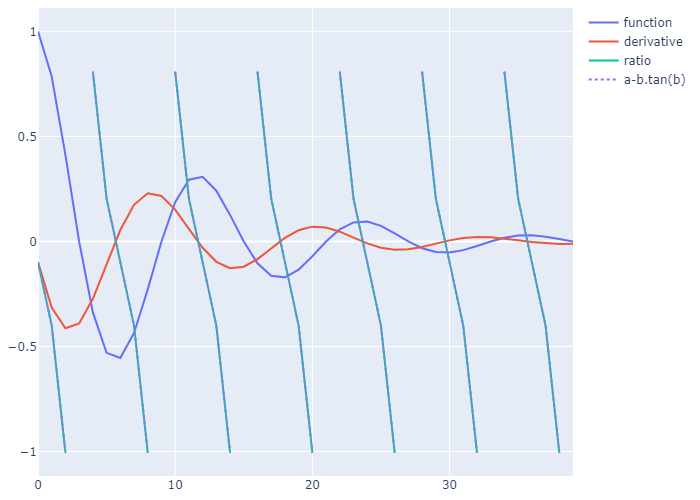

In [5]:
# Ratio between real part of derivative and function plot
fig = go.Figure(**DEF_FIGURE)
fig.add_scatter(y=[v.real for v in func_vals], name='function')
fig.add_scatter(y=[v.real for v in deriv_vals[1]], name='derivative')
fig.add_scatter(y=[crop_val(dv.real/fv.real) for fv,dv in zip(func_vals, deriv_vals[1])],
        name='ratio')
fig.add_scatter(y=[OMEGA.real - OMEGA.imag*crop_val(cmath.tan(OMEGA.imag*t)).real for t in t_range],
        name='a-b.tan(b)', line_dash='dot')
fig.show()

> This ratio is actually the [logarithmic derivative](https://en.wikipedia.org/wiki/Logarithmic_derivative)
> of the function, that is equal to the derivative of logarithm:
>
> $\frac{\partial log(e^{at}cos(bt))}{\partial t} = \frac{\partial(at - log(cos(bt))}{\partial t} = a - b.tan(bt)$

### Using further logarithmic derivatives

Since the logarithmic derivative $\frac{f'(t)}{f(t)} = \frac{\partial e^{at}cos(bt)}{e^{at} \partial t} = a - b.tan(bt)$,
we could try to isolate the individual coefficients by further differentiation:

- First derivative: $\frac{\partial (f'/f)}{\partial t} = \frac{\partial\left(a - b.tan(bt)\right)}{\partial t} = -\frac{b^2}{cos^2(bt)}$

- Second derivative: $\frac{\partial^2 (f'/f)}{\partial t^2} = \frac{\partial^2\left(a - b.tan(bt)\right)}{\partial t^2} = -\frac{2b^3sin(bt)}{cos^3(bt))}$

The ratio between these derivatives (which is also a logarithmic derivative) seems familiar:

${ \frac{\partial^2 (f'/f)}{\partial t^2} }/{ \frac{\partial (f'/f)}{\partial t} } = \frac{2b^3 sin(bt)cos^2(bt)}{cos^3(bt) b^2} = \boxed{2b.tan(bt)}$

#### Finding real part of the exponent coefficient ($a$)
$$
\frac{f'}{f} + \frac{1}2 \frac{ \frac{\partial^2 (f'/f)}{\partial t^2} }{ \frac{\partial (f'/f)}{\partial t} }
= a - b.tan(bt) + \frac{1}{2}2b.tan(bt) = a
$$

The derivatives of the logarithmic derivative can be calculated from the regular derivatives:

- First derivalive:
$$
\frac{\partial \frac{f'}{f}}{\partial t}
= \frac{\partial f'}{f \partial t} + f'\frac{\partial\frac{1}{f}}{\partial t}
= \frac{f''}{f} - f'\frac{1}{f^{2}}\frac{\partial f}{\partial t}
= \frac{f''}{f} - \left(\frac{f'}{f}\right)^2
= \boxed{\frac{f'}{f} \left( \frac{f''}{f'}-\frac{f'}{f} \right)}
$$

- Second derivative:
$$
\frac{\partial^2\frac{f'}{f}}{\partial t^2} = \frac{\partial\left[ \frac{f''}{f} - \left(\frac{f'}{f}\right)^2 \right]}{\partial t}
= \frac{f'''}{f} - \frac{f''f'}{f^2} - 2\frac{f'}{f}\left[\frac{f''}{f} - \left(\frac{f'}{f}\right)^{2}\right]
= \boxed{ \frac{f'''}{f} - 3\frac{f''f'}{f^2} + 2\frac{f'^3}{f^3} }
$$

- The ratio, i.e. logarithmic derivative of first derivalive
$$
2b.tan(bt) = \frac{\frac{f'''}{f} - 3\frac{f''f'}{f^2} + 2\frac{f'^3}{f^3}}{\frac{f''}{f} - \frac{f'^2}{f^2}}
= \frac{f'''f^2 -3f''f'f+2f'^3}{f\left( f''f-f'^2\right)}
$$

Reduce the calculations of $a$, also avoid division by zero when $f(t)=0$:
$$
a = \frac{f'}{f} - \frac{ \frac{f'''}{f} - 3\frac{f''f'}{f^2} + 2\frac{f'^3}{f^3} }{ 2 \frac{f'}{f} \left( \frac{f''}{f'}-\frac{f'}{f} \right) } = \boxed{ \frac{f'''(t) f(t) -f''(t) f'(t)}{2\left[ f''(t) f(t) -f'^2(t)\right]} }
$$

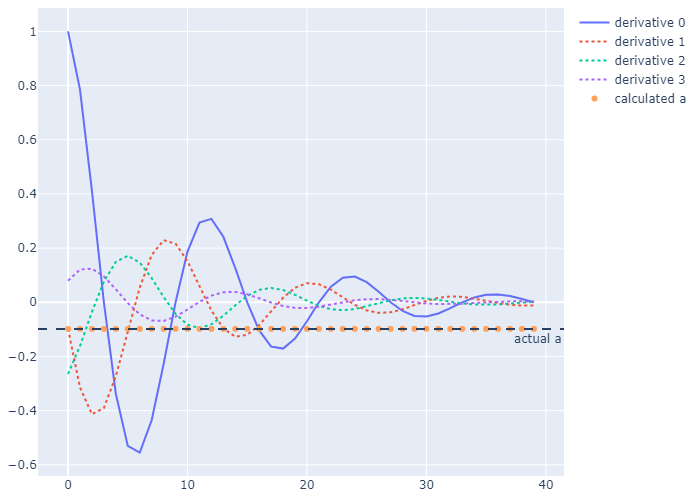

In [6]:
# Find exponent coefficient 'a' from derivatives
fig = go.Figure(**DEF_FIGURE)
def plot_derivs(deriv_vals):
    for i, derivs in enumerate(deriv_vals):
        line_dash = 'dot' if i else None
        fig.add_scatter(y=[v.real for v in derivs], line_dash=line_dash, name='derivative %d'%i)

a_vals = []
# Iterate over the real part of derivatives at each point
for i, derivs in enumerate(zip(*deriv_vals)):
    derivs = [d.real for d in derivs]
    # Deduce real component of exponent
    a = derivs[3]*derivs[0] - derivs[2]*derivs[1]
    a /= 2 * (derivs[2]*derivs[0] - derivs[1]*derivs[1])
    a_vals.append(a)

plot_derivs(deriv_vals)
fig.add_scatter(y=a_vals, mode='markers', name='calculated a')
fig.add_hline(OMEGA.real, line_dash='dash',
        annotation_text='actual a', annotation_position='bottom right')
fig.show()

#### Finding imaginary part of the exponent coefficient ($b$)

Start with the second derivative of the real part of base function:

$f''(t) = \frac{\partial \left[ae^{at}cos(bt) - be^{at}sin(bt)\right]}{\partial t} = e^{at}\left[cos(bt)\left(a^2 -b^2\right) - 2absin(bt)\right]$

The ratio between this derivative and the base function can be useful:

$\frac{f''(t)}{f(t)} = \frac{e^{at}\left[cos(bt)\left(a^2 - b^2\right) - 2ab.sin(bt)\right]}{e^{at}cos(bt)} = a^2 - b^2 - 2ab.tan(bt)$

> This ratio is also the logarithmic derivative multiplied by the logarithmic derivative of the derivative:
>
> $\frac{f''}{f} = \frac{f''}{f'}\frac{f'}{f}$

We already know $a$ and $2b.tan(bt)$, thus:

$b^2 = a^2 - 2ab.tan(bt) - \frac{f''}{f} = \frac{\left(f'''f - f''f'\right)^2}{4\left(f''f - f'^2\right)^2} - \frac{f'''f - f''f'}{2\left(f''f - f'^2\right)}\frac{f'''f^2 - 3f''f'f+2f'^3}{f\left(f''f-f'^2\right)} - \frac{f''}{f}$

$b^2 = \frac{f\left(f'''f - f''f'\right)^2 - 2\left(f'''f - f''f'\right)\left(f'''f^2 - 3f''f'f+2f'^3\right) - 4f''\left(f''f - f'^2\right)^2}{4f\left(f''f - f'^2\right)^2} = \ldots = \frac{-f'''^2f^2 + 6f'''f''f'f + 3f''^2f'^2 - 4f'''f'^3 - 4f''^3f}{4\left(f''f - f'^2\right)^2}$

Finally:

$$b = \boxed{\frac{\pm\sqrt{-f'''^2f^2 + 6f'''f''f'f + 3f''^2f'^2 - 4f'''f'^3 - 4f''^3f}}{2\left(f''f - f'^2\right)}}$$

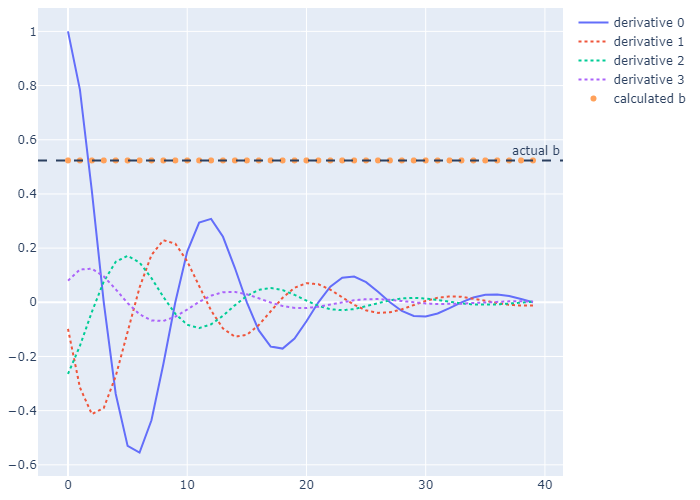

In [7]:
# Find exponent coefficient 'b' from derivatives
b_vals = []
# Iterate over the real part of derivatives at each point
for i, derivs in enumerate(zip(*deriv_vals)):
    derivs = [d.real for d in derivs]
    # Deduce imaginary component of exponent
    b = cmath.sqrt(
            -derivs[3]**2 * derivs[0]**2
            +6 * derivs[3] * derivs[2] * derivs[1] * derivs[0]
            +3 * derivs[2]**2 * derivs[1]**2
            -4 * derivs[3] * derivs[1]**3
            -4 * derivs[2]**3 * derivs[0]
        ).real
    b /= 2 * (derivs[2]*derivs[0] - derivs[1]*derivs[1])
    #CHECKME: The sqrt() must be taken with '-' sign (must confirm)
    b_vals.append(-b)

fig = go.Figure(**DEF_FIGURE)
plot_derivs(deriv_vals)
fig.add_scatter(y=b_vals, mode='markers', name='calculated b')
fig.add_hline(OMEGA.imag, line_dash='dash',
        annotation_text='actual b', annotation_position='top right')
fig.show()

#### Finding imaginary component of the signal value

The real and imaginary components of the Euler's function are quite similar:

- Real: $e^{at}cos(bt)$

- Imaginary: $e^{at}sin(bt)$

Thus, the imaginary component can be calculated, by multiplying the real one by $tan(bt)$:

$e^{at}sin(bt) = e^{at}cos(bt)\boxed{tan(bt)}$

We already know $b$ and $2b.tan(bt)$:

$b = \frac{\pm\sqrt{-f'''^2f^2 + 6f'''f''f'f + 3f''^2f'^2 - 4f'''f'^3 - 4f''^3f}}{2\left(f''f - f'^2\right)}$,
$2b.tan(bt) = \frac{f'''f^2 -3f''f'f+2f'^3}{f\left( f''f-f'^2\right)}$

$$\implies tan(bt) = \frac{1}{2}\frac{2b.tan(bt)}{b}$$

Since, $f$ is the real part of Euler's function $e^{at}cos(bt)$:

$$e^{at}sin(bt) = f \frac{1}{2} \frac{f'''f^2 -3f''f'f+2f'^3}{f\left( f''f-f'^2\right)} \frac{2\left(f''f - f'^2\right)}{\pm\sqrt{-f'''^2f^2 + 6f'''f''f'f + 3f''^2f'^2 - 4f'''f'^3 - 4f''^3f}} =$$

$$= \boxed{\frac{f'''f^2 -3f''f'f+2f'^3}{\pm\sqrt{-f'''^2f^2 + 6f'''f''f'f + 3f''^2f'^2 - 4f'''f'^3 - 4f''^3f}}}$$

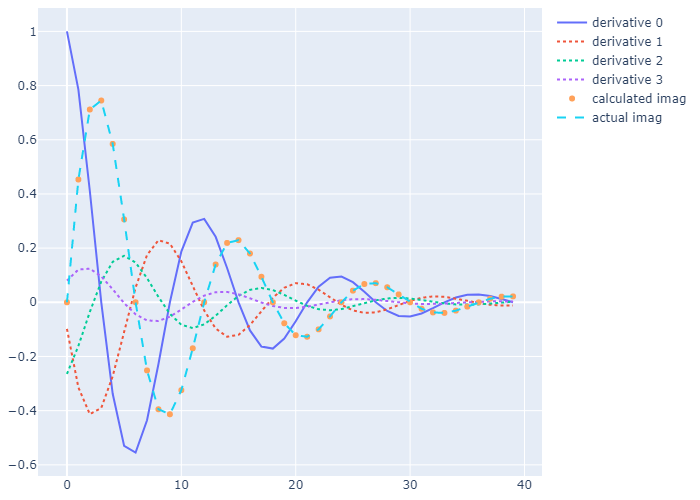

In [8]:
# Find imaginary component of Euler's function
imag_vals = []
# Iterate over the real part of derivatives at each point
for i, derivs in enumerate(zip(*deriv_vals)):
    derivs = [d.real for d in derivs]
    # Deduce imaginary component of the whole function
    imag = (
        derivs[3] * derivs[0] ** 2
        -3 * derivs[2] * derivs[1] * derivs[0]
        +2 * derivs[1] ** 3
    )
    # Denominator part
    imag /= cmath.sqrt(
            -derivs[3]**2 * derivs[0]**2
            +6 * derivs[3] * derivs[2] * derivs[1] * derivs[0]
            +3 * derivs[2]**2 * derivs[1]**2
            -4 * derivs[3] * derivs[1]**3
            -4 * derivs[2]**3 * derivs[0]
        ).real
    #CHECKME: The sqrt() must be taken with '-' sign (must confirm)
    imag_vals.append(-imag)

fig = go.Figure(**DEF_FIGURE)
plot_derivs(deriv_vals)
fig.add_scatter(y=imag_vals, mode='markers', name='calculated imag')
fig.add_scatter(y=[v.imag for v in func_vals], line_dash='dash', name='actual imag')
fig.show()